# Práctica 4 - Algoritmo Genético TSP incompleto con mutaciones

<center>

![Metro Madrid](https://www.comunidad.madrid/sites/default/files/styles/header_featured_image/public/aud/transportes/15319285_1237501699648894_7908259165208581716_n.png?itok=Jl_KjcEf&c=3411492d5a8bd9db09ac6641552d5bee)

</center>


## Introducción

Citando la definición que podemos ver en las transparencias (John Kosa, 1995): <i>"Un algoritmo genético es un algoritmo matemático altamente paralelo que transforma con respecto al tiempo un conjunto de objetos matemáticos individuales usando operaciones genéticas modeladas de acuerdo al principio Darwiniano de reproducción y supervivencia del más apto. Cada uno de estos objetos matemáticos es una cadena de caracteres (letras o números) de longitud fija que se ajusta al modelo de las cadenas de cromosomas, y se les asocia con una cierta función matemática que refleja su aptitud."</i>

Solemos utilizar algoritmos genéticos (AG) para resolver un problema sobre el que no tenemos conocimiento pero sobre el que se emplearía demasiado tiempo para resolver mediante fuerza bruta; sirviendo estos como métodos de optimización aplicados a una función (o problema) particular.

A lo largo del siguiente fichero, implementaremos un algoritmo genético según lo visto en clase y acorde al enunciado de la práctica; que plantea un problema real con la estructura de un problema de optimización. Es decir, utilizaremos un AG como mecanismo computacional de optimización.

## Problema a resolver

Los alcaldes de ciertas poblaciones de la Comunidad de Madrid se han unido para construir una nueva línea de tren ligero que pueda servir a zonas que aún no cubre la red actual de trenes. Para realizar el proyecto los ingenieros de la CAM han pre-seleccionado `L` lugares donde construir las estaciones de metro y han determinado el número potencial de usuarios diarios P que usaría cada estación.

Por limitaciones presupuestarias, la línea de metro solo puede tener `E` estaciones, a escoger entre los `L` lugares (`E` < `L`). El objetivo es determinar qué `E` lugares escoger para las estaciones y el orden en el que se han de conectar de manera que se sirva al mayor número de personas y el recorrido total de la línea sea el menor posible.

## Estructura de un Algoritmo Genético

### Elementos


#### <b>Población</b>

La población es un subconjunto de las soluciones del problema, presentando esta soluciones candidatas para resolver el problema. La población, además, está compuesta por:

- Cromosomas &rarr; Una de las posibles soluciones.
- Genes &rarr; La posición de uno de los elementos de la solución.
- Alelos &rarr; El valor dentro de un gen.

Esto lo podemos ver mejor representado en la siguiente imágen (cortesía de TutorialsPoint):

<br>
<center>

![Problación en AGs](https://www.tutorialspoint.com/genetic_algorithms/images/terminology.jpg)

</center>
<br>

En <b>nuestro caso</b>, podemos ver representada la población y sus elementos en los siguientes elementos:

+ <i>`NPOB`</i> &rarr; Identifíca el tamaño de la población.
+ <i>`E`</i> &rarr; Identifíca el tamaño de los cromosómas; en cada cromosóma, un gen identifica la posición de la estación y el alelo la estación en cuestión (dónde 0 implica que no se encuentra en ninguna posición).

#### <b>Genotipo y Fenotipo</b>

En el contexto de AGs, el genotipo se refiere a la población en el espacio computacional; es decir, como se representa a nivel computacional la población. En nuestro caso, utilizaremos una lista o array con la forma explicada en el apartado anterior.

Por otro lado, el fenotipo se refiere a la representación de la solución en el entorno real del problema que se está intentando resolver. En nuestro caso, esto se vería como la línea resultante y sus correspondientes estaciones.

Por regla general, el fenotipo y el genotipo suelen ser iguales o equivalentes y nuestro caso esto es así, siendo perfectamente factible hablar de nuestra lista (o array) y de nuestra línea de manera indiferente.

#### <b>Función de Fitness (o adecuación)</b>

Función que informa de cuan bueno es un individuo dado en la solución de un problema; es decir, evalúa el fenotipo mediante una función matemática que permanece constante a lo largo de las generaciones. Esta función sería equivalente a la función de coste que podemos encontrar en otros modelos.

Para nuestro problema, la función de fitnes viene dada por la siguiente fórmula matemática:

<br>
$$F_i = \alpha(\sum_{n=1}^{E} P(E_n))-(1-\alpha)(\sum_{n=1}^{E} dist(E_n,E_{n+1}))$$
<br>

Siendo que <i>$\alpha$</i> tiene un valor entre 0 y 1 que da más o menos valor a cada criterio y que <i>$dist()$</i> equivale la distancia entre una estación y la siguiente.

#### <b>Operadores</b>

Los operadores son las diferentes operaciones que se ejercen sobre una población después de haber sido evaluada por la función de fitness y que nos permite obtener poblaciones nuevas (la descendencia de la población actual). Los tres tipos de operadores que utiizamos son: selección, recombinación y mutación.

##### <u>Selección</u>

El operador de selección cuenta con 2 partes:

1. Determinación de que individuos (cromosomas) de la población serán utilizados para la reproducción (padres).
1. Determinación de los individuos de la población que serán sustituidos por los recién generados.

En nuestro caso realizamos una <b>selección elitista</b> en la que:

- El primer 20% está compuesto por el 20% de los mejores cromosomas de la generación padre.
- El siguiente 50% está compuesto por cromosomas generados por el método de la ruleta en función al 20% seleccuionado previamente.
- El último 30% está compuesto por cromosomas generados por el método de la ruleta en función al 80% de cromosomas no seleccionados en la generación padre.

##### <u>Recombinación</u>

El operador de recombinación (o crossover) selecciona más de un progenitor y, a partir de este, produce uno o más descendientes utilizando el material genético de los progenitores. Se asocia a una probabilidad (generalmente alta) dada por <b>$P_C$</b> (probabilidad de crossover).

En nuestro caso, no tenemos un operador de recombinación real; siendo que los descendientes generados pueden mutar o no hacerlo pero no se recombinan en función a varios progenitores.


##### <u>Mutación</u>

El operador de mutación consiste en la alteración aleatoria de cada uno de los genes del individuo con una probabilidad de mutación $P_M$.

En nuestro caso, la recombinación viene dada por el operador `cambiar-estación` que intercambia una estación de la solución por otra al azar que no esté en la solución según el valor de `Pc` (probabilidad de cambiar-estación) y por el operador `intercambiar-estación` que intercambia que intercambia dos estaciones dentro del recorrido según el valor de `Pi` (probabilidad de intercambiar-estación).

#### <b>Condición de Terminación</b>

La condición de terminación de un algoritmo genético es importante para determinar cuándo finalizará una ejecución del AG.

Se ha observado que, inicialmente, el AG progresa muy rápido con mejores soluciones cada pocas iteraciones; pero esto tiende a dejar de ocurrir en las generaciones posteriores, donde las mejoras son muy pequeñas. Debemos, por tanto, utilizar una condición de terminación que nos permita obtener los mejores resultados posibles.

En nuestro caso, nuestra condición de terminación viene dada por un número de generaciones fijo recogido en `NGEN`.

#### <b>Seguimiento del Modelo</b>

Para poder evaluar el progreso de nuestra población y modificar los correspondientes hiperparámetros acorde al mismo para poder mejorar el modelo, mostramos un resumen del proceso y un muestreo de la población cada un número fijo de generaciones; estando estos números recogidos en `NRES` y `NSAMPLE`, respectivamente.

### Pseudocódigo

El pseudocódigo de un algoritmo genético, como podemos comprobar en los apuntes, sería el siguiente:

```
function Algoritmo_Genético():
   1. generar población inicial de individuos
   
   2. Calcular fitness de los individuos de la población
   
   3. while (not condición de terminación):
      3.1. seleccionar individuos con mejor fitness
      3.2. generar individuos mediante recombinación con probabilidad P_c
      3.3. generar individuos mediante mutación con probabilidad P_m
      3.4. calcular fitness de la nueva población
      3.5. seleccionar de superviviente

   return mejor
end Algoritmo_Genético
```

Dicho pseudocódigo se ve representado en la imágen a continuación (obtenida de Mathworks):

<br>
<center>

![Algoritmo Genético](https://www.mathworks.com/help/gads/gaflowchart.png "Algoritmo genético")

</center>
<br>

## Implementación

### Importar librerías de código

En nuestro caso hemos reducido al mínimo el número de librerías de código a utilizar para esta práctica; en nuestro caso utilizamos las siguientes:

#### <b>Numpy</b>

Es una librería numérica que trae el poder computacional de lenguajes como C y Fortran a Python. Utilizamos Numpy para:
  - Utilizar arrays 🔲
  - Transformación de arrays y listas 📶

In [ ]:
import numpy as np

#### <b>Pandas</b>

Es una librería de manipulación y análisis de datos de código abierto rápida, potente, flexible y fácil de usar, construida sobre el lenguaje de programación Python. Usamos Pandas para:
  - Dataframes 📅

In [ ]:
import pandas as pd

#### <b>Scikit-learn</b>
Es una librería de aprendizaje automático de software gratuito para el lenguaje de programación Python. Usamos Scikit-learn para:
  - Evaluación de modelos 🔍

In [ ]:
import sklearn as sk
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#### <b>Matplotlib</b>
Es una librería para crear visualizaciones estáticas, animadas e interactivas en Python. Usamos Matplotlib para:
  - Mostrar gráficos 📊
  - Tipo de renderizado `inline`

In [ ]:
import matplotlib as mplt
import matplotlib.pyplot as plt
%matplotlib inline

#### <b>NetworkX</b>
Es una librería para la creación, manipulación y estudio de la estructura, dinámica y funciones de redes complejas:
- Crear gráfos ⚙



In [ ]:
import networkx as nx

#### <b>Numba</b>

Optimización del rendimiento de las funciones:

- Correr Python como si fuese un lenguaje compilado en vez de interpretado con `@jit`

In [ ]:
import numba as nb
from numba import jit, njit

#### <b>Librerías del Sistema</b>

Conjunto de librerías por defecto de Python & Jupyter Notebooks para mostrar dataframes en Jupyter 🪐

In [ ]:
import IPython as ip
from IPython.display import SVG, display, display_html, HTML

#### <b>Importlib-Metadata</b>

Librería para encontrar versiones de librerías 🔖


In [ ]:
import importlib.metadata

#### <b>Versiones de Librerías</b>

In [ ]:
# Ignorar alertas
import warnings
warnings.filterwarnings('ignore')

print('\tNumpy\t\t\t>>> \tv', np.__version__)
print('\tPandas\t\t\t>>> \tv', pd.__version__)
print('\tSklearn\t\t\t>>> \tv', sk.__version__)
print('\tMatplotlib\t\t>>> \tv', mplt.__version__)
print('\tNetworkx\t\t>>> \tv', importlib.metadata.version('networkx'))
print('\tNumba\t\t\t>>> \tv', nb.__version__)
print('\tIPython\t\t\t>>> \tv', ip.__version__)

	Numpy			>>> 	v 1.22.4
	Pandas			>>> 	v 1.5.3
	Sklearn			>>> 	v 1.2.2
	Matplotlib		>>> 	v 3.7.1
	Networkx		>>> 	v 3.1
	Numba			>>> 	v 0.56.4
	IPython			>>> 	v 7.34.0


### Preparamos los datos del Fichero


#### <b>Cargamos el Fichero</b>

In [ ]:
dict_df = pd.read_excel('Datos_TSPincompleto.xlsx', sheet_name=['Distancias','Población'])
pd.set_option("display.precision", 2)

#### <b>Analizamos las Distancias</b>

In [ ]:
distancias_df = dict_df.get('Distancias').fillna(0.0)
distancias_df = distancias_df.drop(distancias_df.index[:7]).reset_index(drop=True)
distancias_df.columns = distancias_df.iloc[0].values
distancias_df = distancias_df[1:]
distancias_df = distancias_df.set_index(['Municipio'])
distancias_df.index.name = None
HTML(distancias_df.to_html())

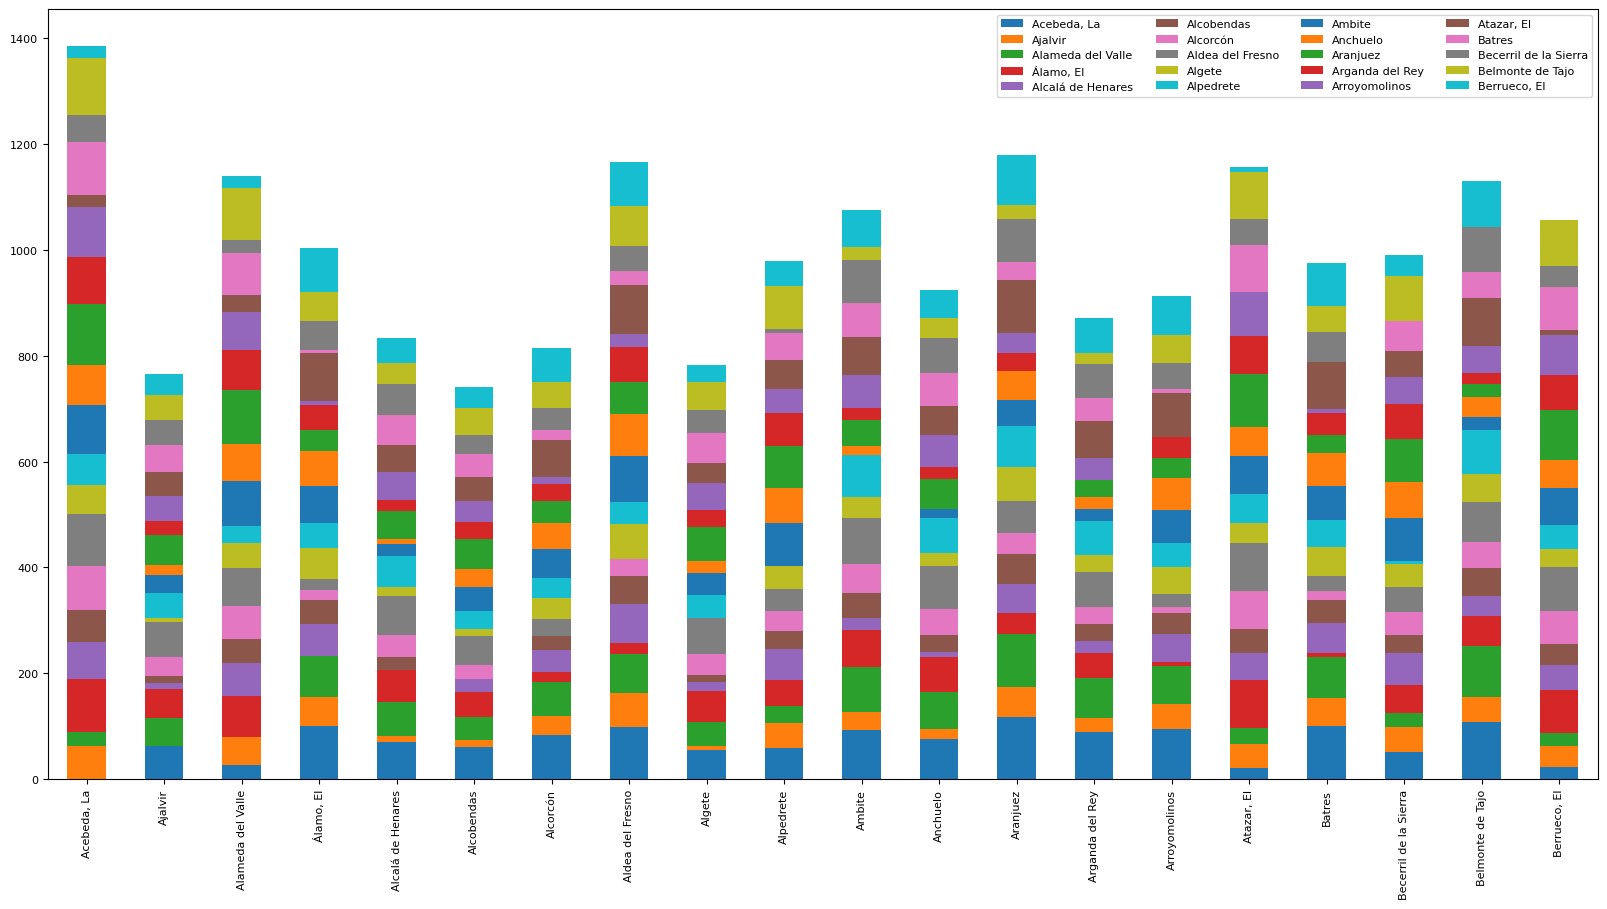

In [ ]:
distancias_df.plot.bar(figsize=(20,10),stacked=True,fontsize="8")
plt.legend(fontsize="8",ncol=4)
plt.show()

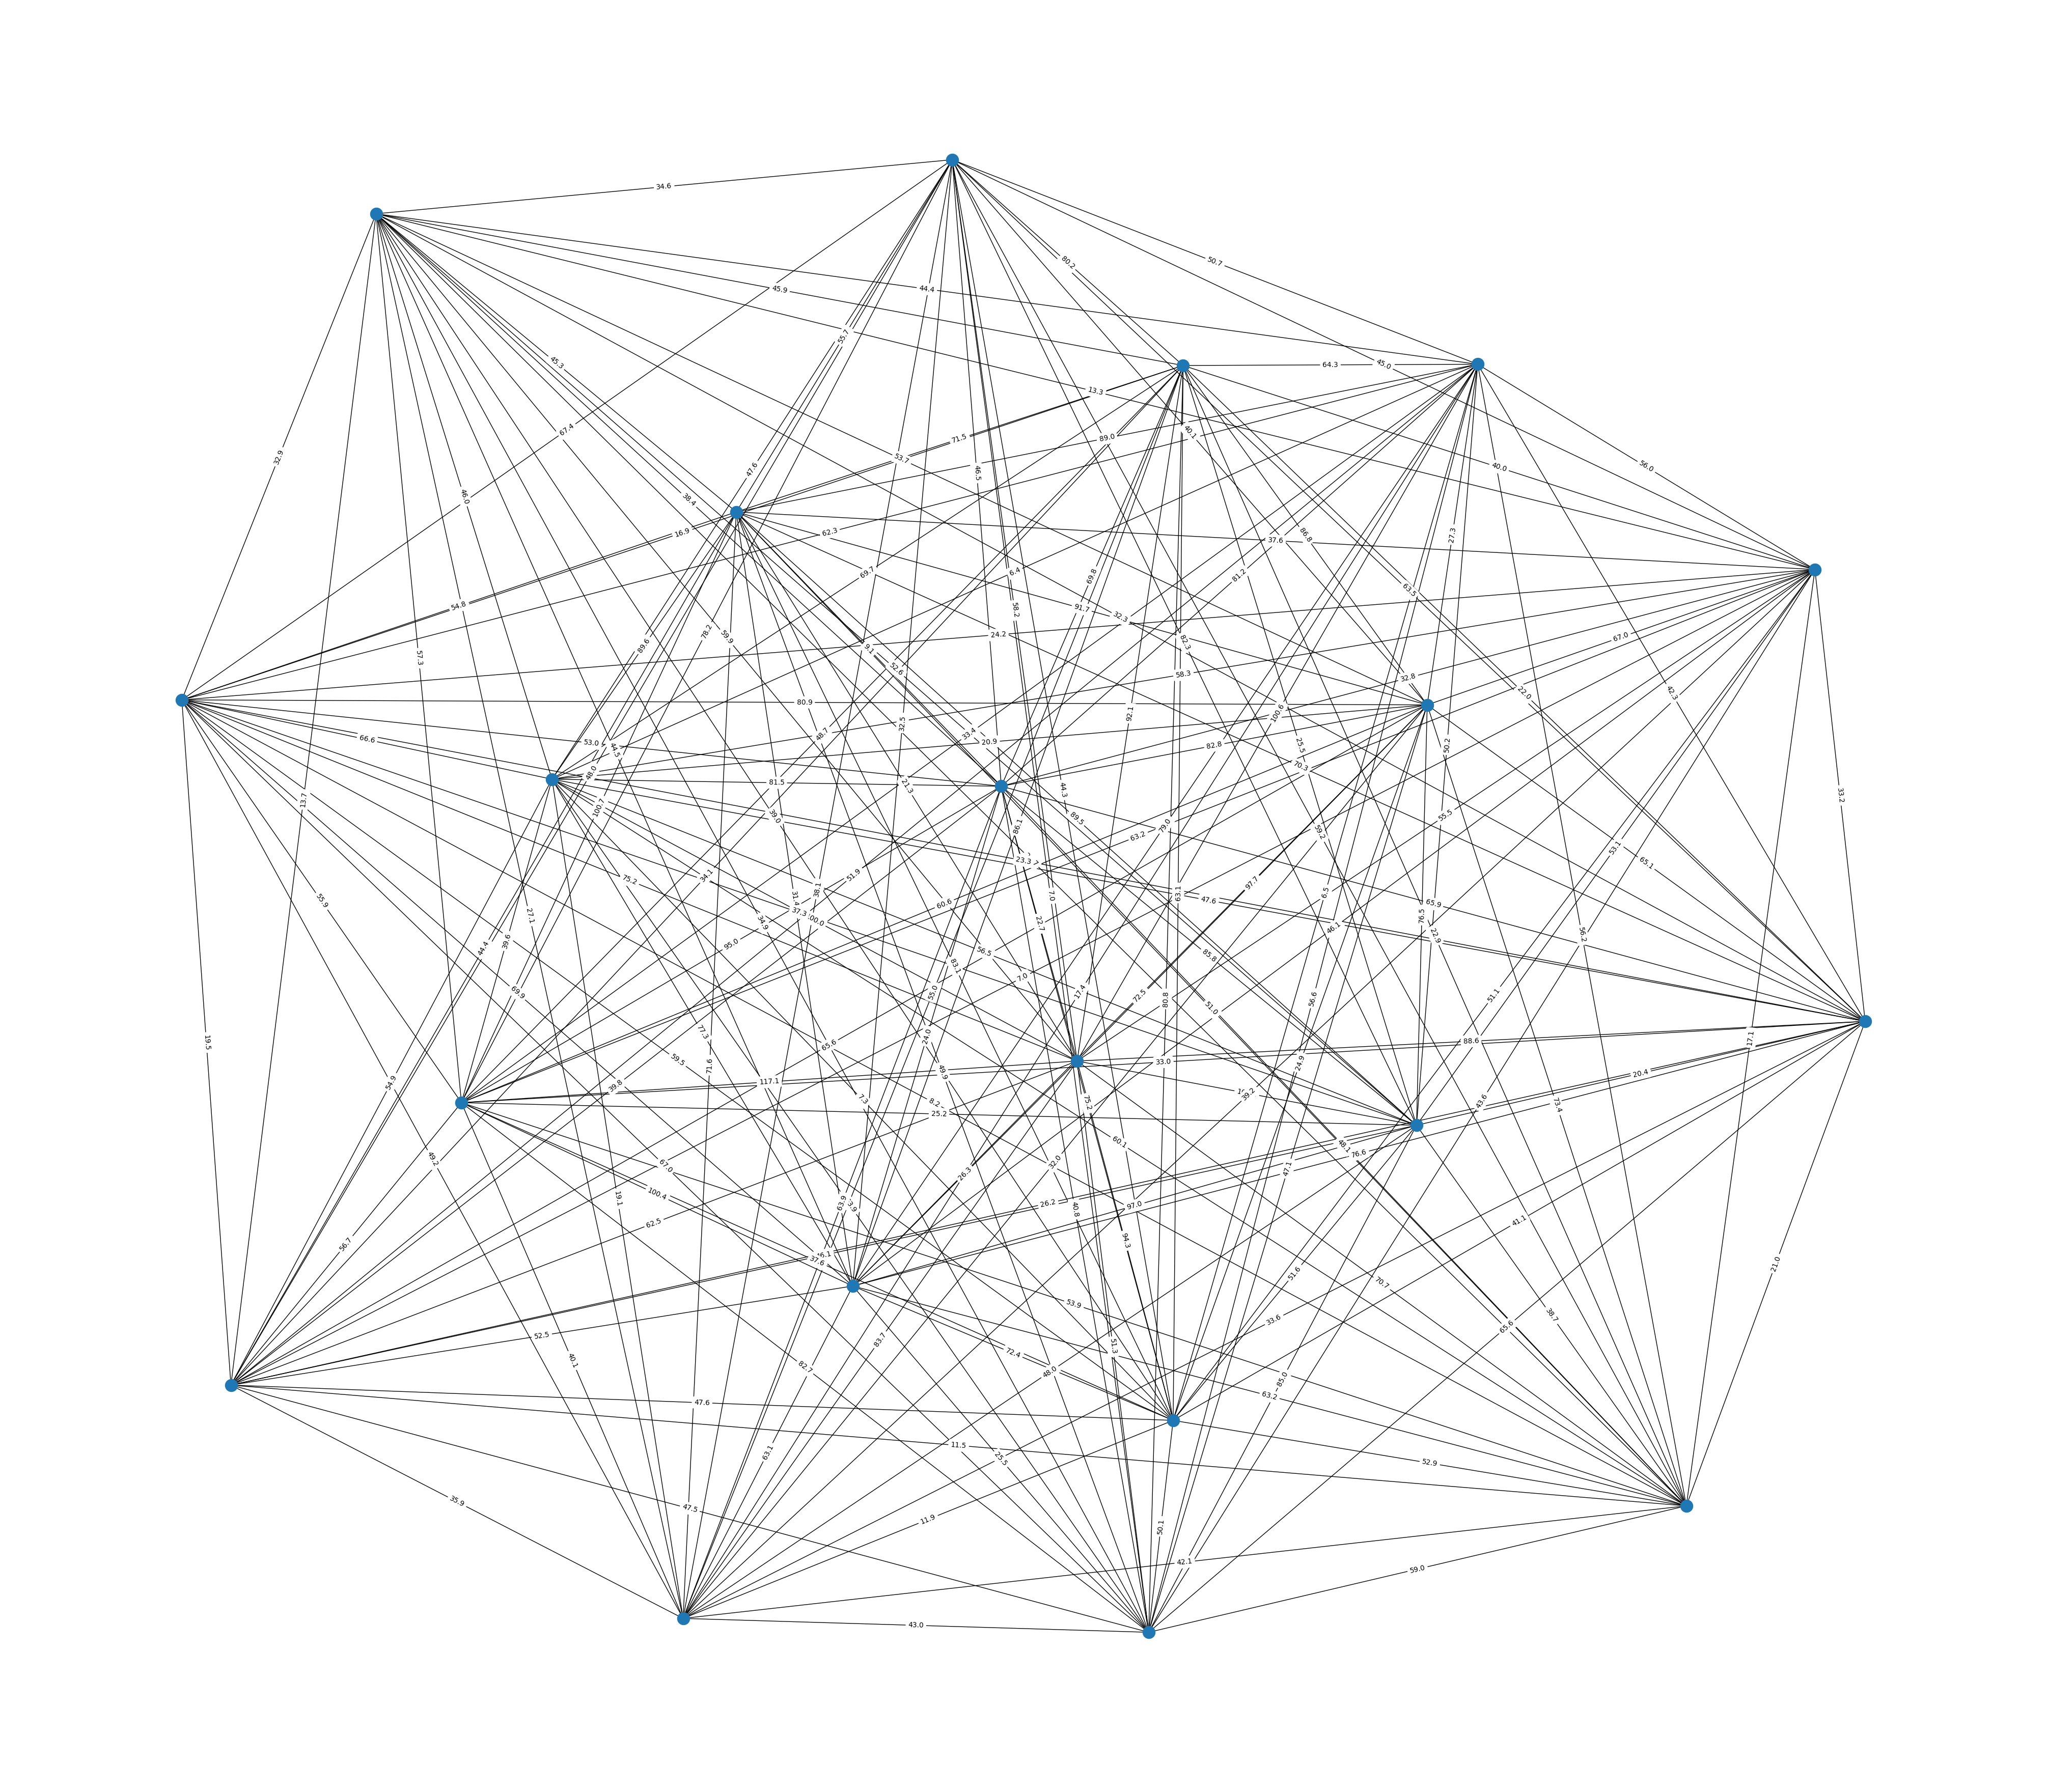

In [ ]:
plt.figure(figsize=(40,35))
G = nx.from_numpy_array(np.round(np.array(distancias_df.to_numpy(), dtype=np.float), 1))#, create_using=nx.DiGraph)
layout = nx.spring_layout(G)
nx.draw(G, layout, font_size=8)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)
plt.show()

#### <b>Analizamos las Poblaciones</b>

In [ ]:
poblacion_df = dict_df.get('Población')
poblacion_df = poblacion_df.drop(poblacion_df.index[:3]).reset_index(drop=True)
poblacion_df.columns = poblacion_df.iloc[0].values
poblacion_df = poblacion_df[1:]
poblacion_df = poblacion_df.set_index(poblacion_df.iloc[:,0])
poblacion_df = poblacion_df.drop(poblacion_df.columns[0], axis=1)
poblacion_df.index.name = None
HTML(poblacion_df.to_html())

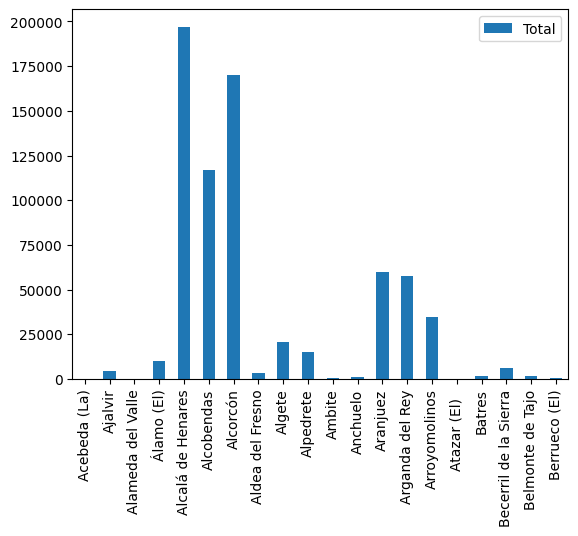

In [ ]:
poblacion_df.plot.bar(rot=90)
plt.show()

### Preparar Funciones

#### <b>Función de Fitness</b>

In [ ]:
@jit
def dist(chromosome:np.ndarray, n:int) -> float:
  if chromosome.size > n+1:
    return distancias_df.iloc[np.int(chromosome[n]-1),np.int(chromosome[n+1]-1)]
  else:
    return 0

@jit
def fitness(alpha:float, chromosome:np.ndarray, better_fitness:bool=False) -> float:
  popl_tot = 0
  dist_tot = 0

  for n in range(chromosome.size):
    popl_tot += poblacion_df.iloc[np.int(chromosome[0]-1)].values[0]

  for n in range(chromosome.size):
    dist_tot += dist(chromosome, n)

  if better_fitness:
    return (alpha*popl_tot)+((1-alpha)*(1/dist_tot))

  return (alpha*popl_tot)-((1-alpha)*dist_tot)

#### <b>Función para Generación de Población</b>

In [ ]:
@jit
def generatePopulation(l:int, e:int, npob:int) -> np.ndarray:
  rng = np.random.default_rng()
  population = np.array([rng.choice([*range(1,l+1)], size=(e), replace=False)])

  for i in range(npob-1):
    population = np.concatenate((population, np.array([rng.choice([*range(1,l+1)], size=(e), replace=False)])), axis=0)

  return population

#### <b>Selección Elitista</b>

##### <u>Cambiar Estaciones</u>

In [ ]:
@jit
def cambiar_estaciones(l:int, offspring:np.ndarray, current:int) -> np.ndarray:
  elements = np.asarray([*range(1,l+1)])
  elements = [i for i in elements if i not in offspring]

  value_change = np.random.choice(elements)

  new_offspring = np.copy(offspring)
  new_offspring[current] = value_change

  return new_offspring

##### <u>Intercambiar Estaciones</u>

In [ ]:
@jit
def intercambiar_estaciones(offspring:np.ndarray, current:int) -> np.ndarray:
  idx_change = np.random.randint(offspring.shape[0])

  while current == idx_change:
    idx_change = np.random.randint(offspring.shape[0])

  new_offspring = np.copy(offspring)
  new_offspring[current], new_offspring[idx_change] = new_offspring[idx_change], new_offspring[current]

  return new_offspring

##### <u>Mutación Alternativa</u>

Existen otros métodos de mutación alternativos que podríamos implementar; sin embargo, debido a que suelen efectuar cambios sobre el cromosoma a nivel global, en vez de gen a gen (cómo lo hacemos nosotros), no los hemos implementado.

Aún así, mencionaremos a continuación algunos de los métodos alternativos junto con una pequeña explicación:

- <u>Mutación por mezcla</u> &rarr; Tomaríamos un fragmento del cromosoma (pudiendose llegar el cromosoma completo) y mezclamos el orden de los elementos del fragmento.
- <u>Mutación por inversión</u> &rarr; Tomamos un fragmento igual que anteriormente; sin embargo, esta vez invertimos el orden de los elementos.

##### <u>Método de la ruleta</u>

Para *seleccionar padre*:

In [ ]:
@njit
def getOffspringType(psa:np.ndarray) -> int:
  offspring_from = np.random.random()

  for i in range(psa.size):
    if psa[i] >= offspring_from:
      return i

  return 0


Para *seleccionar operador*:

In [ ]:
# Pc + Pi <= 1 (si es igual que 1, entonces Pnada = 0)

@jit
def getOperator(pc:float, pi:float) -> int:
  offspring_operator = np.random.random()

  if pc >= offspring_operator:
    return 1

  elif pc+pi >= offspring_operator:
    return 2

  return 0

##### <u>Función de Selección</u>


In [ ]:
@jit
def generateOffspring(l:int, parents:np.ndarray, psa:np.ndarray, pc:float, pi:float) -> np.ndarray:

  parent_is = getOffspringType(psa)
  offspring = parents[parent_is]
  operator_is = getOperator(pc, pi)

  for i in range(offspring.size):
    if operator_is == 1:
      offspring = cambiar_estaciones(l, offspring, i)

    elif operator_is == 2:
      offspring = intercambiar_estaciones(offspring, i)

  return offspring


@jit
def get20_or(pop:np.ndarray, fitness:np.ndarray, new_fitness:np.ndarray, rows:int, percent_type:int = 0) -> np.ndarray:

  index_is = np.where(np.in1d(fitness, new_fitness))[0]

  new_population = np.array([pop[index_is[0]]])

  if percent_type == 1:
    for i in range(1, pop.shape[0] - rows):
      idx = index_is[i]
      new_population = np.concatenate((new_population, np.array([pop[idx]])), axis=0)
  else:
    for i in range(1, rows):
      idx = index_is[i]
      new_population = np.concatenate((new_population, np.array([pop[idx]])), axis=0)

  return new_population

@jit
def get50(l:int, parents:np.array, parents_fitness:np.ndarray, rows:int, rows_off:int, pc:float, pi:float):

  parent_ps = parents_fitness / np.sum(parents_fitness)
  parent_psa = np.zeros(rows)

  parent_psa[0] = parent_ps[0]
  for i in range(1, rows):
    parent_psa[i] = parent_ps[i]+parent_ps[i-1]

  new_population = np.array([generateOffspring(l, parents, parent_psa, pc, pi)])
  for i in range(1, rows_off):
    new_population = np.concatenate((new_population, np.array([generateOffspring(l, parents, parent_psa, pc, pi)])), axis=0)

  return new_population

@jit
def get30(l:int, pop:np.ndarray, fitness:np.ndarray, fitness_sort:np.ndarray, rows_not:int, rows_left:int, pc:float, pi:float) -> np.ndarray:

  fitness_30 = fitness_sort[rows_not:]
  parents = get20_or(pop,fitness,fitness_30,rows_not,1)

  parent_ps = fitness_30 / np.sum(fitness_30)
  parent_psa = np.zeros(pop.shape[0]-rows_not)

  parent_psa[0] = parent_ps[0]
  for i in range(1, pop.shape[0]-rows_not):
    parent_psa[i] = parent_ps[i]+parent_ps[i-1]

  new_population = np.array([generateOffspring(l, parents, parent_psa, pc, pi)])
  for i in range(1, rows_left):
    new_population = np.concatenate((new_population, np.array([generateOffspring(l, parents, parent_psa, pc, pi)])), axis=0)

  return new_population


@jit
def selection(l:int, population:np.ndarray, alpha:float, pc:float, pi:float) -> np.ndarray:
  rows_elite = np.int(np.ceil(population.shape[0]*elitism))
  rows_elite_offspring = np.int(np.floor(population.shape[0]*(0.7-elitism)))
  rows_left = population.shape[0] - rows_elite - rows_elite_offspring

  population_fitness = np.zeros(population.shape[0])

  for i in range(population.shape[0]):
    population_fitness[i] = fitness(alpha, population[i], True)

  population_fitness_sorted = np.sort(population_fitness)[::-1]

  # 20 percent (elitism)
  fitness_20 = population_fitness_sorted[:rows_elite]
  next_population_elite = get20_or(population, population_fitness, fitness_20, rows_elite)

  # 50 percent
  next_population_50 = get50(l, next_population_elite, fitness_20, rows_elite, rows_elite_offspring, pc, pi)

  # 30 percent
  next_population_30 = get30(l, population, population_fitness, population_fitness_sorted, rows_elite, rows_left, pc, pi)

  next_total_population = np.concatenate((next_population_elite,next_population_50,next_population_30), axis=0)
  return next_total_population

#### <b>Función para Entrenar Modelo</b>


In [ ]:
@jit
def getBest(pop:np.ndarray, a:float) -> np.ndarray:
  idx = 0
  best_f = fitness(a, pop[0], True)
  for i in range(1, pop.shape[0]):
    temp = fitness(a, pop[i], True)
    if best_f < temp:
      best_f = temp
      idx = i

  rows, occur = np.unique(pop, axis=0, return_counts=True)
  idx_occur = np.where(np.all(rows==pop[idx],axis=1))[0][0]
  best_n = occur[idx_occur]
  best_p = best_n/pop.shape[0]*100
  return [best_f, best_n, best_p]

@jit
def getCons(pop:np.ndarray) -> np.ndarray:
  chromosome = np.zeros(pop.shape[1])
  for i in range(chromosome.size):
    values, counts = np.unique(pop[:,i], return_counts=True)
    chromosome[i] = values[counts.argmax()]

  return chromosome

@jit
def summary(current:int, pop:np.ndarray, a:float):
  if print_data: print("======================================")
  if print_data: print("Generación: ", current)
  best_fitness, best_number, best_percent = getBest(pop, a)
  if print_data: print("BESTf: " + str(best_fitness) + " - BESTn:" + str(best_number) + " - BEST%:" + str(best_percent)+ "%")
  cons_c = getCons(pop)
  cons_f = fitness(a, cons_c, True)
  if print_data: print("CONS: " + str(cons_c) + " - CONSf:" + str(cons_f))

  return [best_fitness, best_number, best_percent, cons_f]

@jit
def sample(current:int, pop:np.ndarray, a:float):

  sum_list = summary(current, pop, a)
  if print_data: print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
  if print_data: print("Muestra del 20% de la poblacion (" + str(np.int(np.ceil(pop.shape[0]/5))) + "):")
  sample_pop = pop[np.random.choice(pop.shape[0], np.int(np.ceil(pop.shape[0]/5)), replace=False), :]
  if print_data: print(sample_pop)
  return sum_list

@jit
def genetic_alg(l:int, e:int, npob:int, ngen:int, alpha:float, pc:float, pi:float, nres:int, nsample:int):
  population = generatePopulation(l, e, npob)
  current_gen = 0
  if print_data: print("L:"+ str(l) +" - E:" + str(e) + " - NPOB:" + str(npob) + " - NGEN:" + str(ngen) + " - Pc:" + str(pc) + " - Pi:" + str(pi) + " - Alpha:" + str(alpha))
  while (current_gen<ngen):
    population = selection(l, population, alpha, pc, pi)
    if current_gen%nsample == 0:
      sample(current_gen, population, alpha)
    elif current_gen%nres == 0:
      summary(current_gen, population, alpha)
    current_gen += 1
  end_sample = sample(current_gen, population, alpha)
  if print_data: print("======================================")
  return {'L':float(l), 'E':float(e), 'NPOB':float(npob), 'NGEN':float(ngen), 'Pc':float(pc), 'Pi':float(pi), 'Alpha':float(alpha), 'BESTf':float(end_sample[0]), 'BESTn':float(end_sample[1]), 'BEST%':float(end_sample[2]), 'CONf':float(end_sample[3])}

#### <b>Ejemplo de Ejecución</b>

In [ ]:
print_data = True
elitism = 0.2
genetic_alg(poblacion_df.size, 10, 20, 1000, 0.1, 0.45, 0.35, 10, 100)

L:20 - E:10 - NPOB:20 - NGEN:1000 - Pc:0.45 - Pi:0.35 - Alpha:0.1
Generación:  0
BESTf: 196494.58021912104 - BESTn:6 - BEST%:30.0%
CONS: [10. 19.  8.  5.  2.  6.  9.  7. 17.  4.] - CONSf:14705.595552559962
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Muestra del 20% de la poblacion (4):
[[ 6  1 10  2 19  8 20  9  4  3]
 [15 20 10  5 16 19  2 13  9 17]
 [ 5  7  8 17  3  2  9 19 16 12]
 [ 9  1 10 20  4  3 15 12 11  7]]
Generación:  10
BESTf: 196494.58021912104 - BESTn:20 - BEST%:100.0%
CONS: [ 5.  7.  8. 17.  3.  2.  9. 19. 16. 12.] - CONSf:196494.58021912104
Generación:  20
BESTf: 196494.58021912104 - BESTn:20 - BEST%:100.0%
CONS: [ 5.  7.  8. 17.  3.  2.  9. 19. 16. 12.] - CONSf:196494.58021912104
Generación:  30
BESTf: 196494.58021912104 - BESTn:20 - BEST%:100.0%
CONS: [ 5.  7.  8. 17.  3.  2.  9. 19. 16. 12.] - CONSf:196494.58021912104
Generación:  40
BESTf: 196494.58021912104 - BESTn:20 - BEST%:100.0%
CONS: [ 5.  7.  8. 17.  3.  2.  9. 19. 16. 12.] - CONSf:196494.58021912104
Generación:  

{'L': 20.0,
 'E': 10.0,
 'NPOB': 20.0,
 'NGEN': 1000.0,
 'Pc': 0.45,
 'Pi': 0.35,
 'Alpha': 0.1,
 'BESTf': 196494.58021912104,
 'BESTn': 20.0,
 'BEST%': 100.0,
 'CONf': 196494.58021912104}

### Pruebas y Optimización de Modelos

En esta sección, vemos los entrenamientos y análisis realizados sobre los modelos para obtener su mejor configuración.

Directamente a continuación vemos los rangos de los hiperparámetros con los que vamos a trabajar.

In [ ]:
l = poblacion_df.size
pc = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
pi = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
E = [2, 4, 6, 8, 10, 12, 14, 16, 18]
alpha = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
npob = [10, 25, 50, 75, 100]
ngen = [100, 200, 300, 400, 500]
elitism = 0.2 # tomamos 0.2 por defecto y el valor máximo es 0.5
print_data = False

#### <b>Función para Entrenar Modelo</b>

##### <u>Estudiar "E"</u>

In [ ]:
df_pruebas_e = pd.DataFrame(columns = ['L', 'E', 'NPOB', 'NGEN', 'Pc', 'Pi', 'Alpha', 'BESTf', 'BESTn', 'BEST%', 'CONf'])

for i in range(len(E)):
  df_dictionary = pd.DataFrame(genetic_alg(
      poblacion_df.size,
      int(round(E[i])),
      npob[int(round((len(npob)-1)/2))],
      ngen[int(round((len(ngen)-1)/2))],
      alpha[int(round((len(alpha)-1)/2))],
      pc[int(round((len(pc)-1)/2))],
      pi[int(round((len(pi)-1)/2))],
      int(round(ngen[int(round((len(ngen)-1)/2))]/10)),
      int(round(ngen[int(round((len(ngen)-1)/2))]/5))), index=[0])
  df_pruebas_e = df_pruebas_e.append(df_dictionary, ignore_index=True)

df_pruebas_e.sort_values(by=['E'])
df_pruebas_e.to_csv('pruebasE.csv')
HTML(df_pruebas_e.to_html())

<Axes: title={'center': 'E'}, xlabel='E'>

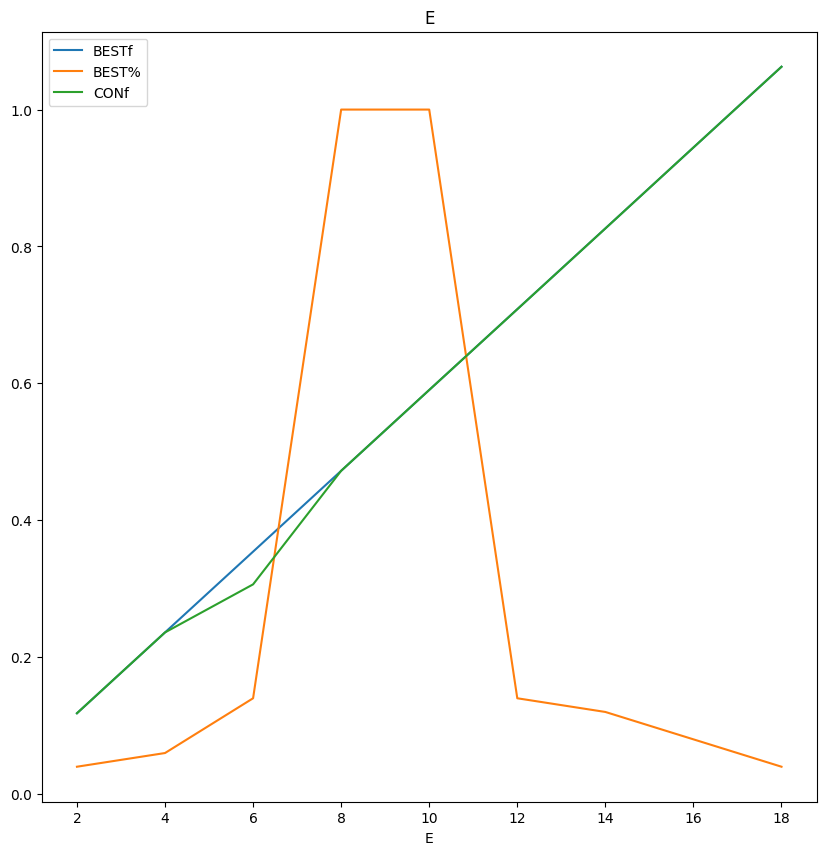

In [ ]:
df_pruebas_e['BESTf'] = df_pruebas_e['BESTf'].div(1000000).round(4)
df_pruebas_e['BEST%'] = df_pruebas_e['BEST%'].div(100).round(4)
df_pruebas_e['CONf'] = df_pruebas_e['CONf'].div(1000000).round(4)
df_pruebas_e.plot(x='E', y=['BESTf', 'BEST%', 'CONf'], kind='line', figsize=(10, 10), title="E")
print(' ')

Viendo los resultados de la gráfica, podemos ver que el crecimiento de los fitness es constante debido a la forma en la que se calcula, por tanto, debemos fijarnos en el progreso del porcentaje de BEST. Esto nos permite ver que el valor más óptimo de "E" está entre 8 y 10 (nos quedaremos con el valor más alto con el fin de maximizar los fitness), aproximadamente.

##### <u>Estudiar "Alpha", "NPOB" y "NGEN"</u>

In [ ]:
df_pruebas_alpha_pob_gen = pd.DataFrame(columns = ['L', 'E', 'NPOB', 'NGEN', 'Pc', 'Pi', 'Alpha', 'BESTf', 'BESTn', 'BEST%', 'CONf'])

for i in range(len(npob)):
  for j in range(len(ngen)):
    for k in range(len(alpha)):
      df_dictionary = pd.DataFrame(genetic_alg(
          poblacion_df.size,
          int(round(E[int(round((len(E)-1)/2))])),
          npob[i],
          ngen[j],
          alpha[k],
          pc[int(round((len(pc)-1)/2))],
          pi[int(round((len(pi)-1)/2))],
          int(round(ngen[j]/10)),
          int(round(ngen[j]/5))), index=[0])
      df_pruebas_alpha_pob_gen = df_pruebas_alpha_pob_gen.append(df_dictionary, ignore_index=True)

df_pruebas_alpha_pob_gen.sort_values(by=['Alpha', 'NPOB', 'NGEN'])
df_pruebas_alpha_pob_gen.to_csv('pruebasAPG.csv')
HTML(df_pruebas_alpha_pob_gen.to_html())

<Axes: title={'center': 'NGEN'}, xlabel='NGEN'>

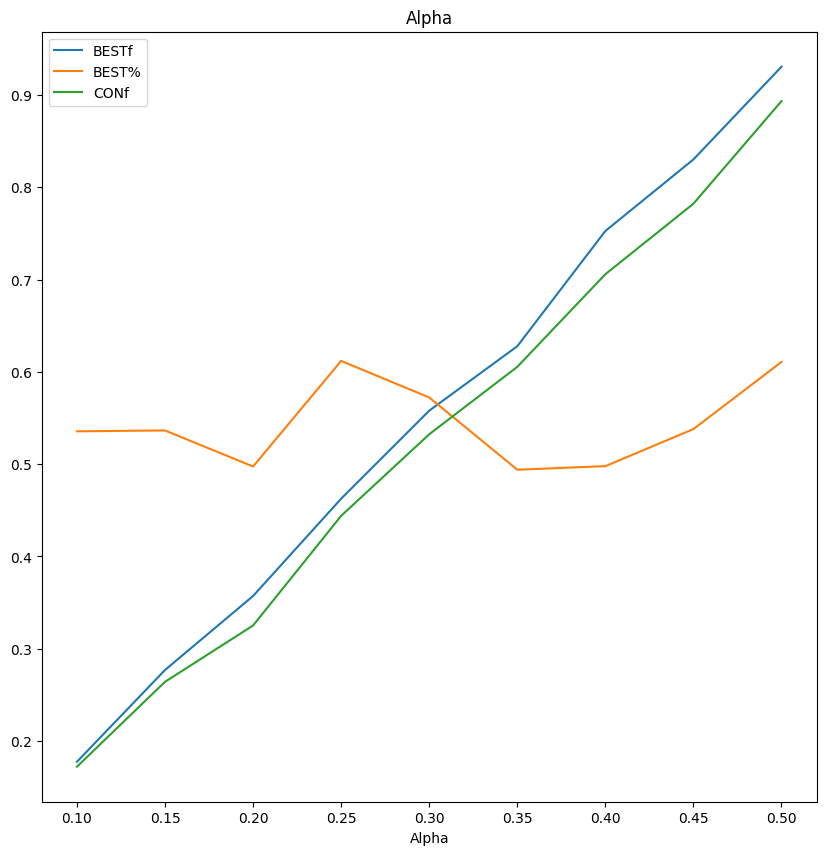

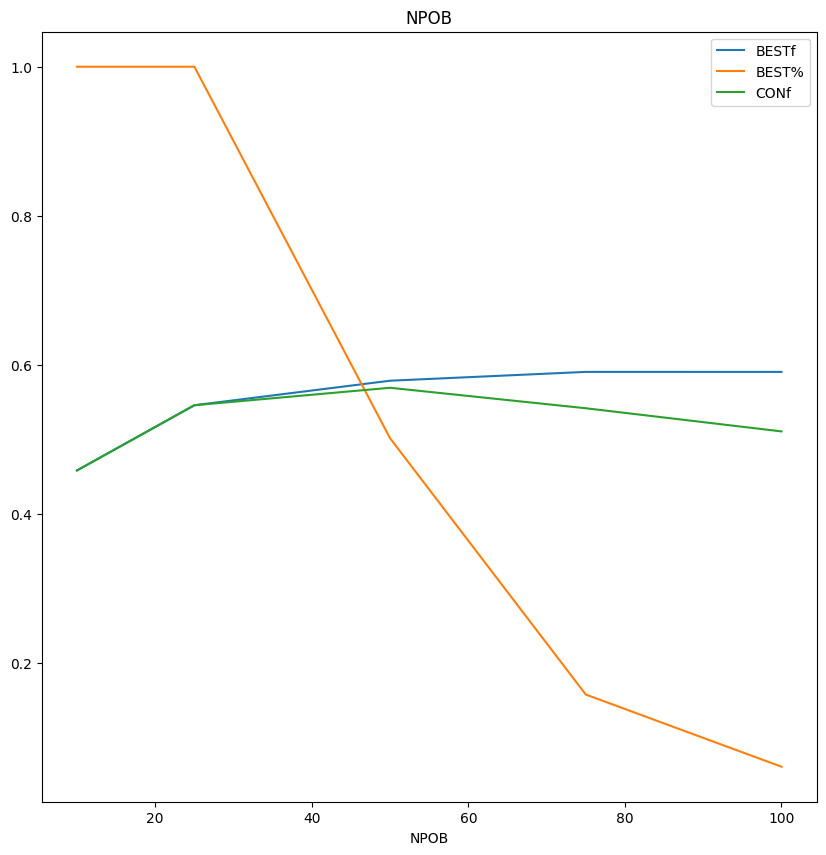

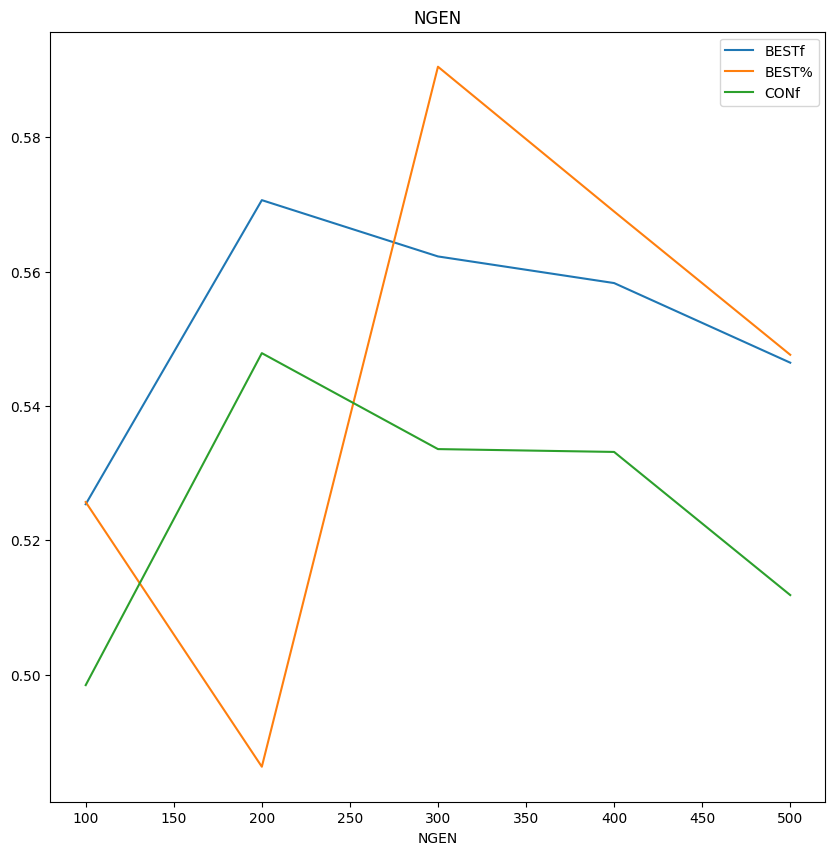

In [ ]:
df_pruebas_alpha_pob_gen['BESTf'] = df_pruebas_alpha_pob_gen['BESTf'].div(1000000).round(4)
df_pruebas_alpha_pob_gen['BEST%'] = df_pruebas_alpha_pob_gen['BEST%'].div(100).round(4)
df_pruebas_alpha_pob_gen['CONf'] = df_pruebas_alpha_pob_gen['CONf'].div(1000000).round(4)
alpha_df = df_pruebas_alpha_pob_gen.groupby(by=['Alpha']).mean()
alpha_df.plot(y=['BESTf', 'BEST%', 'CONf'], kind='line', figsize=(10, 10), title="Alpha")
print(' ')
npob_df = df_pruebas_alpha_pob_gen.groupby(by=['NPOB']).mean()
npob_df.plot(y=['BESTf', 'BEST%', 'CONf'], kind='line', figsize=(10, 10), title="NPOB")
print(' ')
ngen_df = df_pruebas_alpha_pob_gen.groupby(by=['NGEN']).mean()
ngen_df.plot(y=['BESTf', 'BEST%', 'CONf'], kind='line', figsize=(10, 10), title="NGEN")
print(' ')

##### <u>Estudiar "Pc" y "Pi"</u>

In [ ]:
df_pruebas_prob = pd.DataFrame(columns = ['L', 'E', 'NPOB', 'NGEN', 'Pc', 'Pi', 'Alpha', 'BESTf', 'BESTn', 'BEST%', 'CONf'])

for i in range(len(pc)):
  for j in range(len(pi)):
    df_dictionary = pd.DataFrame(genetic_alg(
        poblacion_df.size,
        int(round(E[int(round((len(E)-1)/2))])),
        npob[int(round((len(npob)-1)/2))],
        ngen[int(round((len(ngen)-1)/2))],
        alpha[int(round((len(alpha)-1)/2))],
        pc[i],
        pi[j],
        int(round(ngen[int(round((len(ngen)-1)/2))]/10)),
        int(round(ngen[int(round((len(ngen)-1)/2))]/5))), index=[0])
    df_pruebas_prob = df_pruebas_prob.append(df_dictionary, ignore_index=True)

df_pruebas_prob.sort_values(by=['Pc', 'Pi'])
df_pruebas_prob.to_csv('pruebasProb.csv')
HTML(df_pruebas_prob.to_html())

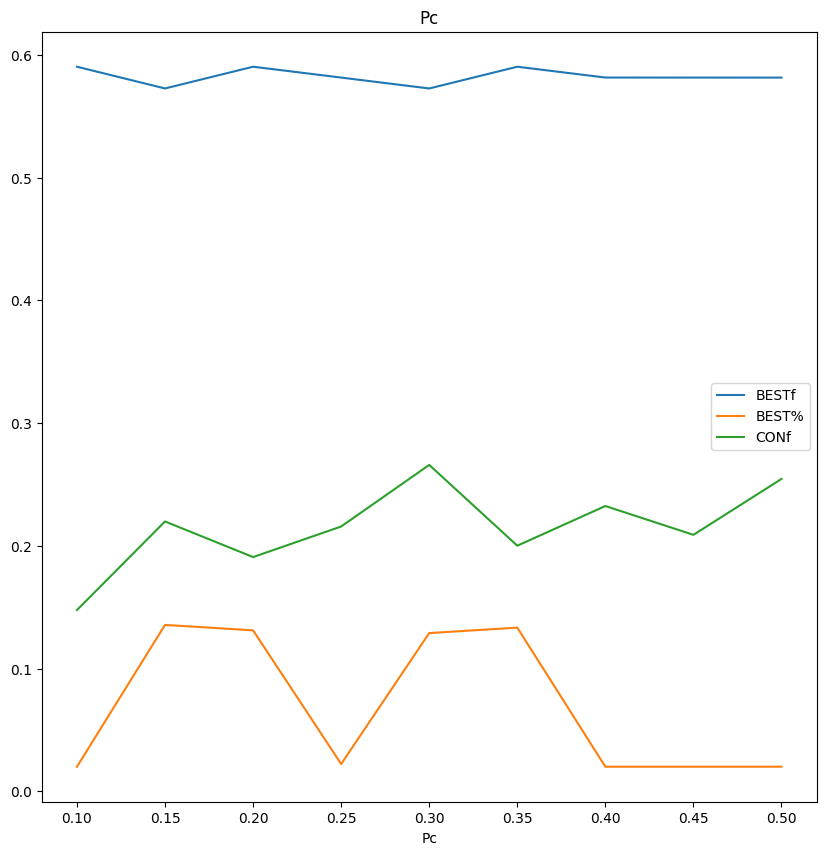

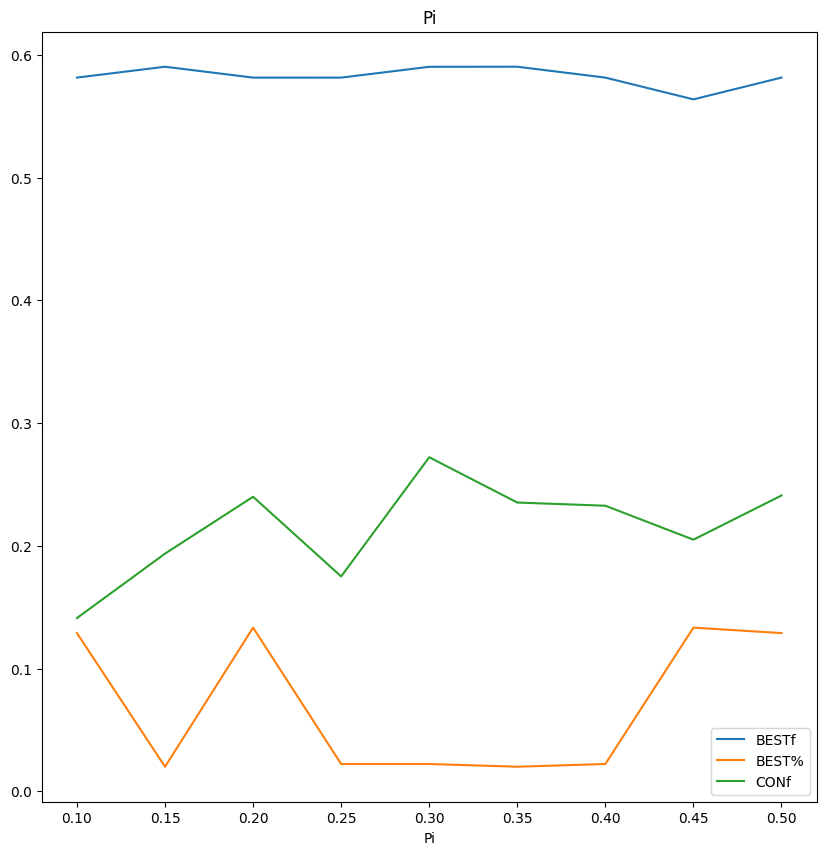

In [ ]:
df_pruebas_prob['BESTf'] = df_pruebas_prob['BESTf'].div(1000000).round(4)
df_pruebas_prob['BEST%'] = df_pruebas_prob['BEST%'].div(100).round(4)
df_pruebas_prob['CONf'] = df_pruebas_prob['CONf'].div(1000000).round(4)
pc_df = df_pruebas_prob.groupby(by=['Pc']).mean()
pc_df.plot(y=['BESTf', 'BEST%', 'CONf'], kind='line', figsize=(10, 10), title="Pc")
print(' ')
pi_df = df_pruebas_prob.groupby(by=['Pi']).mean()
pi_df.plot(y=['BESTf', 'BEST%', 'CONf'], kind='line', figsize=(10, 10), title="Pi")
print(' ')

Viendo los resultados de la gráfica, podemos ver que x e y; por tanto podemos ver que el valor más óptimo de "Pc" es n y el de "Pi" es n, aproximadamente.

##### <u>Estudiar porcentaje de Elitismo</u>

In [ ]:
df_pruebas_elitismo = pd.DataFrame(columns = ['L', 'E', 'NPOB', 'NGEN', 'Pc', 'Pi', 'Alpha', 'BESTf', 'BESTn', 'BEST%', 'CONf'])
elitism = 0

for a in range(10):
  elitism += 0.05
  df_dictionary = pd.DataFrame(genetic_alg(
    poblacion_df.size,
    int(round(E[int(round((len(E)-1)/2))])),
    npob[int(round((len(npob)-1)/2))],
    ngen[int(round((len(ngen)-1)/2))],
    alpha[int(round((len(alpha)-1)/2))],
    pc[int(round((len(pc)-1)/2))],
    pi[int(round((len(pi)-1)/2))],
    int(round(ngen[int(round((len(ngen)-1)/2))]/10)),
    int(round(ngen[int(round((len(ngen)-1)/2))]/5))), index=[0])
  df_pruebas_elitismo = df_pruebas_elitismo.append(df_dictionary, ignore_index=True)

df_pruebas_elitismo.to_csv('pruebasElitismo.csv')
HTML(df_pruebas_elitismo.to_html())

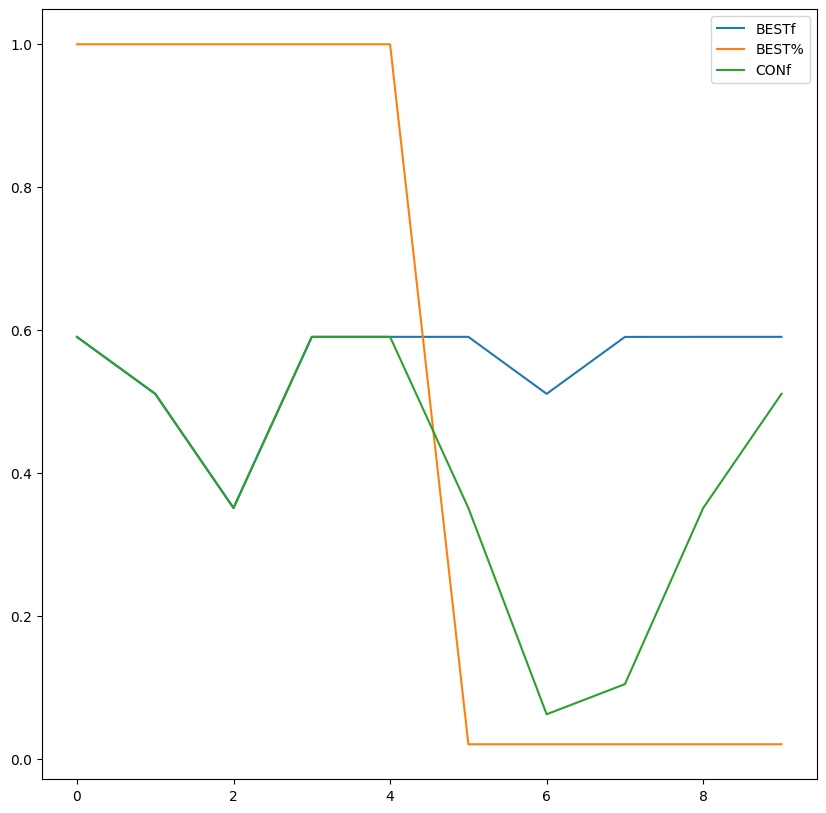

In [ ]:
df_pruebas_elitismo['BESTf'] = df_pruebas_elitismo['BESTf'].div(1000000).round(4)
df_pruebas_elitismo['BEST%'] = df_pruebas_elitismo['BEST%'].div(100).round(4)
df_pruebas_elitismo['CONf'] = df_pruebas_elitismo['CONf'].div(1000000).round(4)
df_pruebas_elitismo.plot(y=['BESTf', 'BEST%', 'CONf'], kind='line', figsize=(10, 10))
print(' ')

Viendo los resultados de la gráfica, podemos ver que el valor de BEST fitness permance constante y que el del fitness del cromosoma consenso cae por encima de 25%. Por otro lado, el porcentaje de BEST varia como hemos visto en todos los problemas mucho dada la aleatoriedad del algoritmo, de todos modos, podemos ver que, por encima de 25%, su valor se estanca con respecto al de las otras métricas; por tanto podemos ver que el porcentaje más óptimo de elitismo se encuentra entre el 20 y 25%, aproximadamente.

### Prueba de modelos en masa

In [ ]:
probar_en_masa = False
cargar_pruebas = True

La celda a continuación puede llegar a tardar más de 1 día en compilar; en caso de querer correrla, cambiar a `True` la variable "probar_en_masa".

Por otro lado, en caso de querer cargar un set de pruebas (obtenido de otro entrenamiento en masa), podemos cargar un dataframe de entrenamiento bajo el nombre de *pruebasGeneral.csv* cambiando a `True` la variable "cargar_pruebas".

In [ ]:
if probar_en_masa:
  print_data = False
  elitism = 0
  df_pruebas = pd.DataFrame(columns = ['L', 'E', 'NPOB', 'NGEN', 'Pc', 'Pi', 'Alpha', 'BESTf', 'BESTn', 'BEST%', 'CONf'])

  for a in range(len(ngen)):
    for b in range(len(npob)):
      for c in range(len(alpha)):
        for d in range(len(pc)):
          for e in range(len(pi)):
            for f in range(len(E)):
              df_dictionary = pd.DataFrame(genetic_alg(poblacion_df.size, int(round(E[f])), npob[b], ngen[a], alpha[c], pc[d], pi[e], int(round(ngen[a]/10)), int(round(ngen[a]/5))), index=[0])
              df_pruebas = df_pruebas.append(df_dictionary, ignore_index=True)

  df_pruebas.to_csv('pruebas.csv')
  HTML(df_pruebas.to_html())
elif cargar_pruebas:
  df_pruebas = pd.read_csv('pruebas.csv')
  HTML(df_pruebas.to_html())

#### <b>Análisis del Entrenamiento</b>

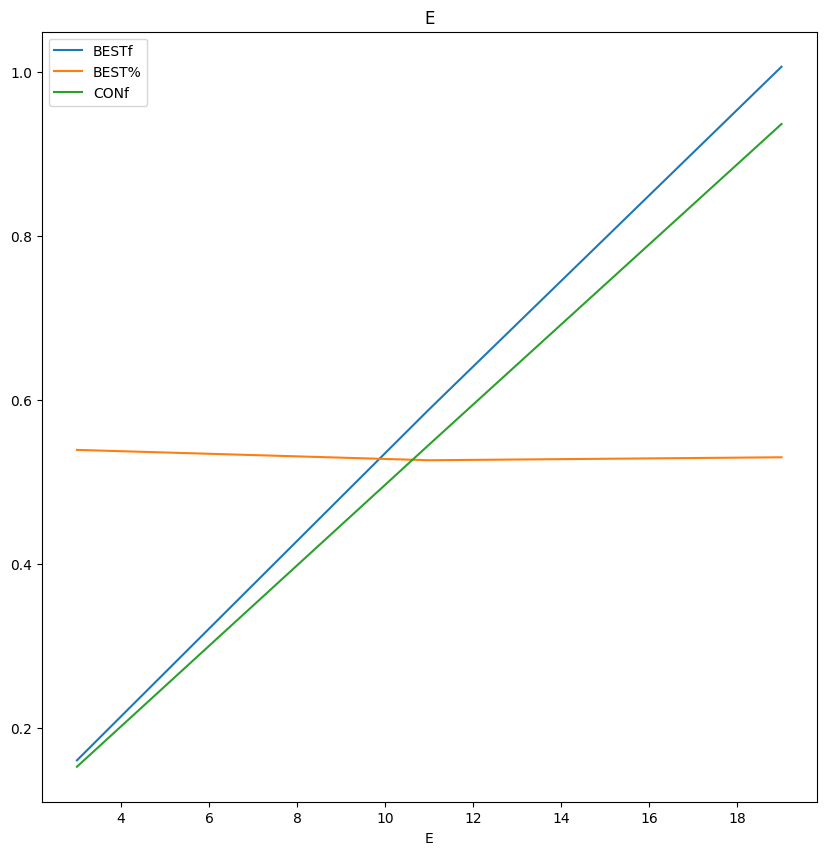

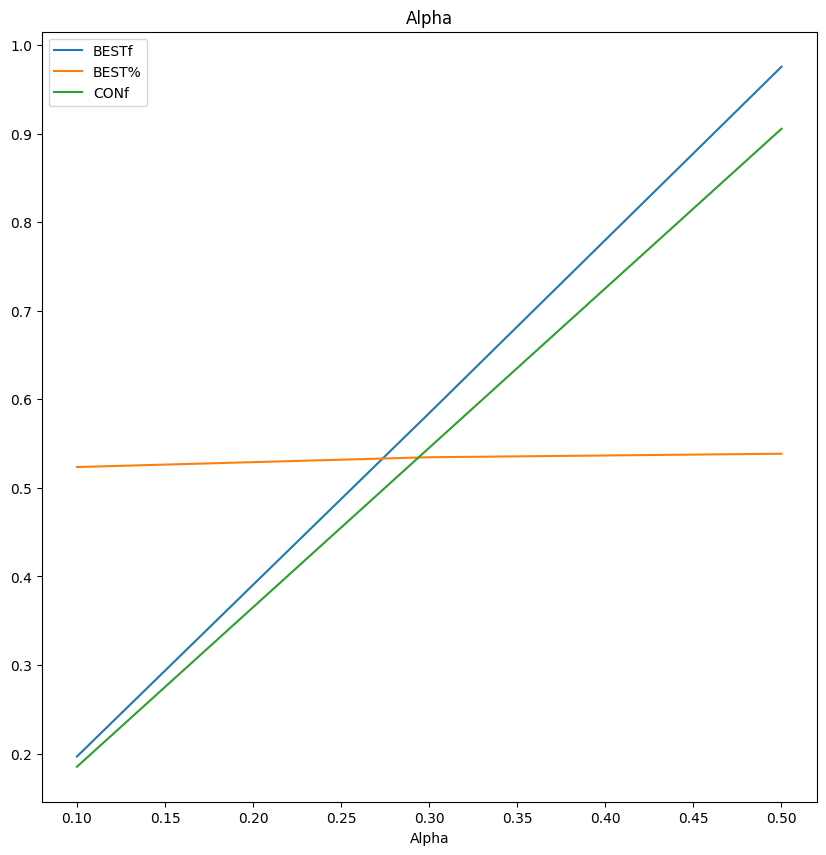

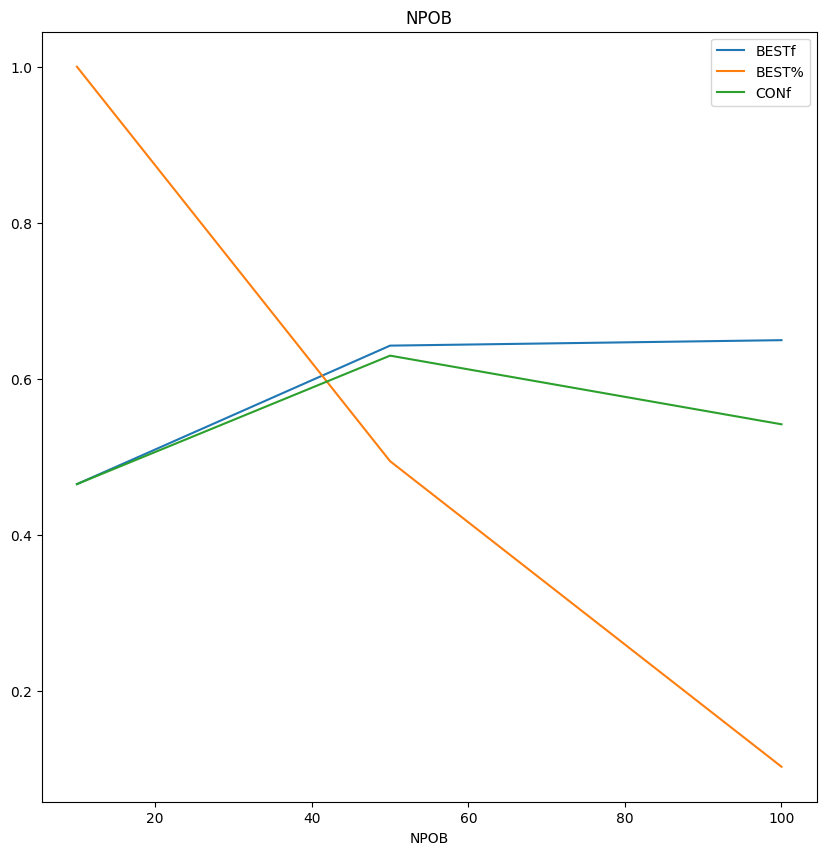

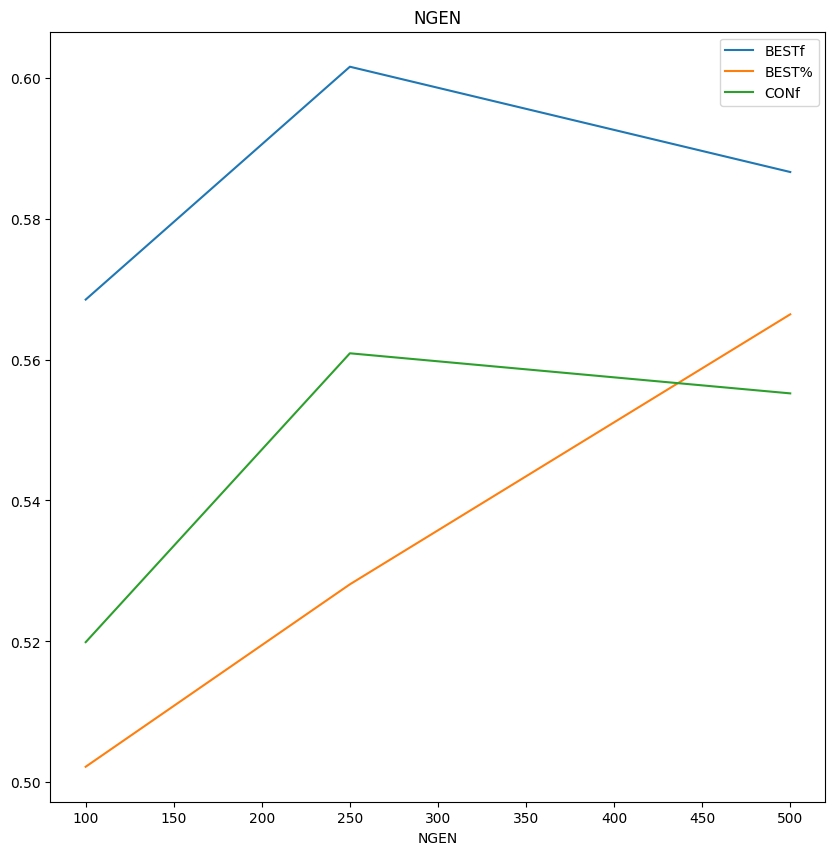

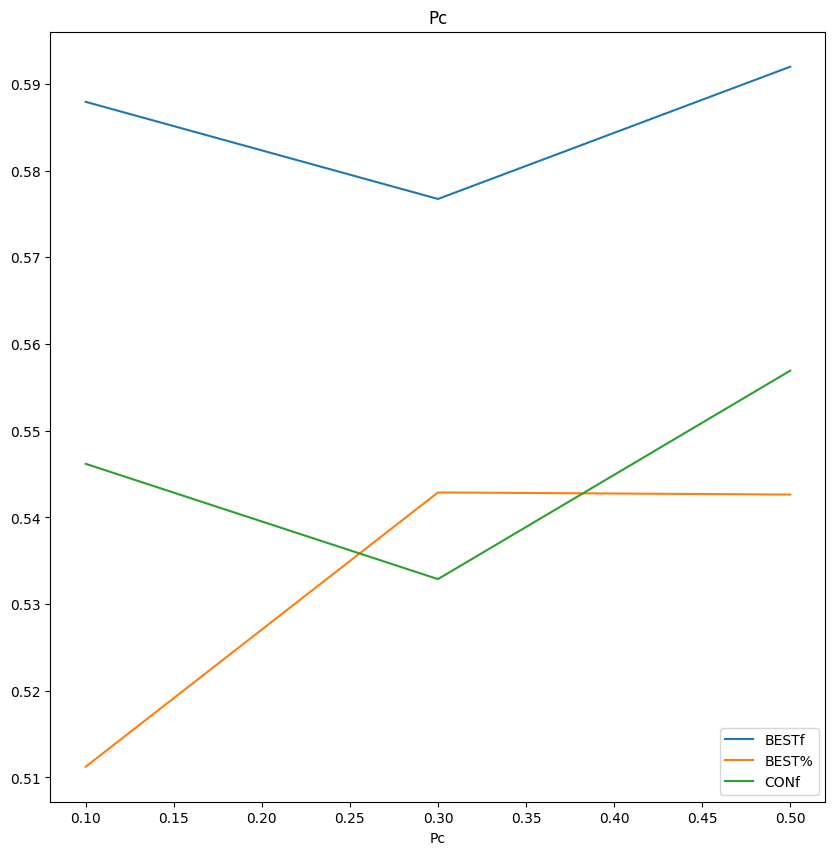

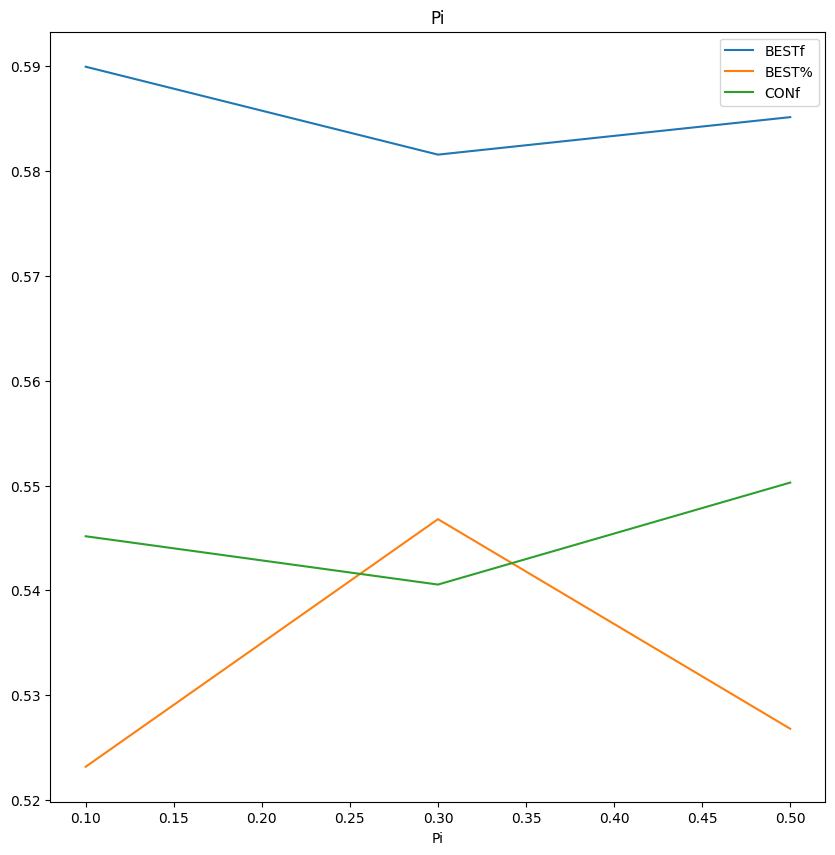

In [ ]:
if probar_en_masa or cargar_pruebas:
  df_pruebas['BESTf'] = df_pruebas['BESTf'].div(1000000).round(4)
  df_pruebas['BEST%'] = df_pruebas['BEST%'].div(100).round(4)
  df_pruebas['CONf'] = df_pruebas['CONf'].div(1000000).round(4)
  e_df = df_pruebas.groupby(by=['E']).mean()
  e_df.plot(y=['BESTf', 'BEST%', 'CONf'], kind='line', figsize=(10, 10), title="E")
  print(' ')
  alpha_df = df_pruebas.groupby(by=['Alpha']).mean()
  alpha_df.plot(y=['BESTf', 'BEST%', 'CONf'], kind='line', figsize=(10, 10), title="Alpha")
  print(' ')
  npob_df = df_pruebas.groupby(by=['NPOB']).mean()
  npob_df.plot(y=['BESTf', 'BEST%', 'CONf'], kind='line', figsize=(10, 10), title="NPOB")
  print(' ')
  ngen_df = df_pruebas.groupby(by=['NGEN']).mean()
  ngen_df.plot(y=['BESTf', 'BEST%', 'CONf'], kind='line', figsize=(10, 10), title="NGEN")
  print(' ')
  pc_df = df_pruebas.groupby(by=['Pc']).mean()
  pc_df.plot(y=['BESTf', 'BEST%', 'CONf'], kind='line', figsize=(10, 10), title="Pc")
  print(' ')
  pi_df = df_pruebas.groupby(by=['Pi']).mean()
  pi_df.plot(y=['BESTf', 'BEST%', 'CONf'], kind='line', figsize=(10, 10), title="Pi")

### Mejor Configuración

In [ ]:
elitism = 0.25
print_data = True
genetic_alg(poblacion_df.size, 10, 50, 300, 0.25, 0.3, 0.3, 25, 75)